# Assignment 16 (KNN)

## Import Libraries

In [29]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score , classification_report, confusion_matrix
from sklearn.decomposition import PCA

## Load Dataset

In [30]:
df = pd.read_csv("Zoo.csv")
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


## EDA

In [31]:
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [32]:
df.tail()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7
100,wren,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2


In [34]:
df.dtypes

animal name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
type            int64
dtype: object

In [35]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [37]:
df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [38]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
96     False
97     False
98     False
99     False
100    False
Length: 101, dtype: bool

In [39]:
df.duplicated().sum()

0

In [40]:
numeric_df = df.drop(columns=['animal name'])  # remove text column
numeric_df

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


## Data Analysis with Visualization

C:\Users\Admin\AppData\Local\Temp\ipykernel_5988\3642328921.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette="Set2")


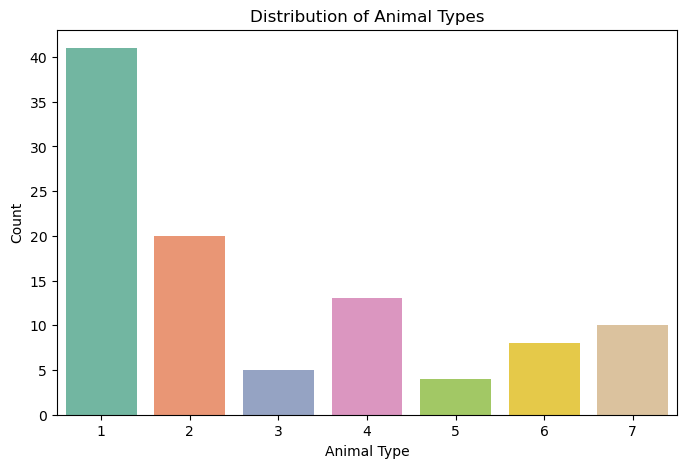

In [41]:
# Class Distribution
plt.figure(figsize=(8,5))
sns.countplot(x='type', data=df, palette="Set2")
plt.title("Distribution of Animal Types")
plt.xlabel("Animal Type")
plt.ylabel("Count")
plt.show()

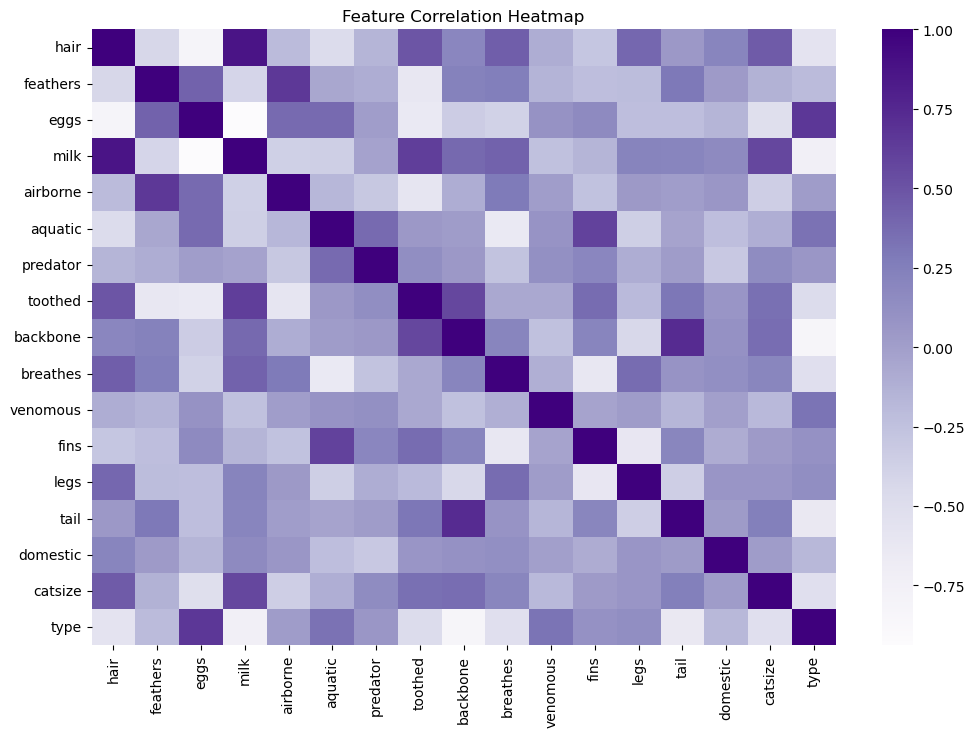

In [42]:
# Feature Correlation Heatmap 
plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), cmap="Purples", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

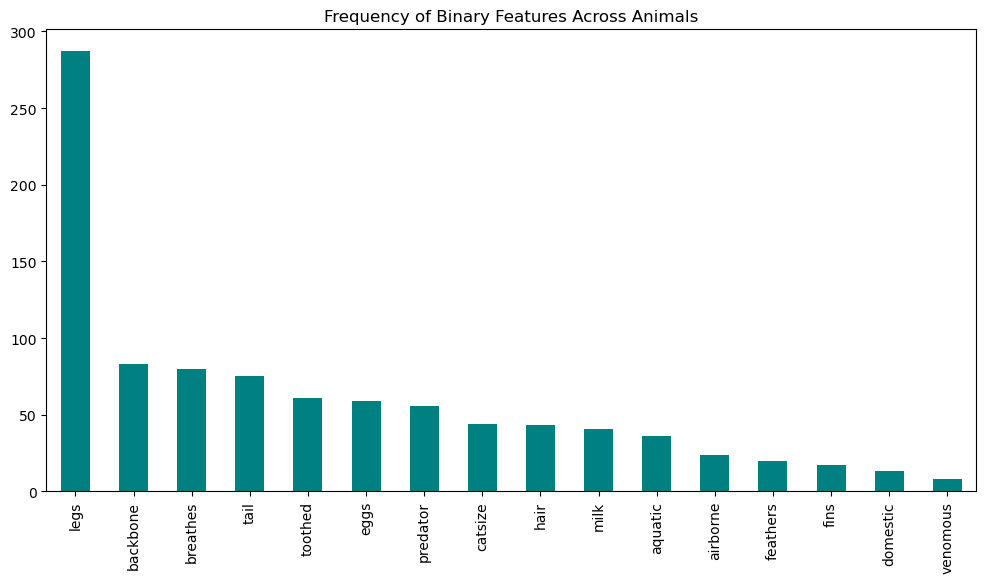

In [43]:
# Count of Binary Features 
binary_features = df.drop(columns=["animal name","type"])  # drop non-feature columns
binary_features.sum().sort_values(ascending=False).plot(kind='bar', figsize=(12,6), color="teal")
plt.title("Frequency of Binary Features Across Animals")
plt.show()

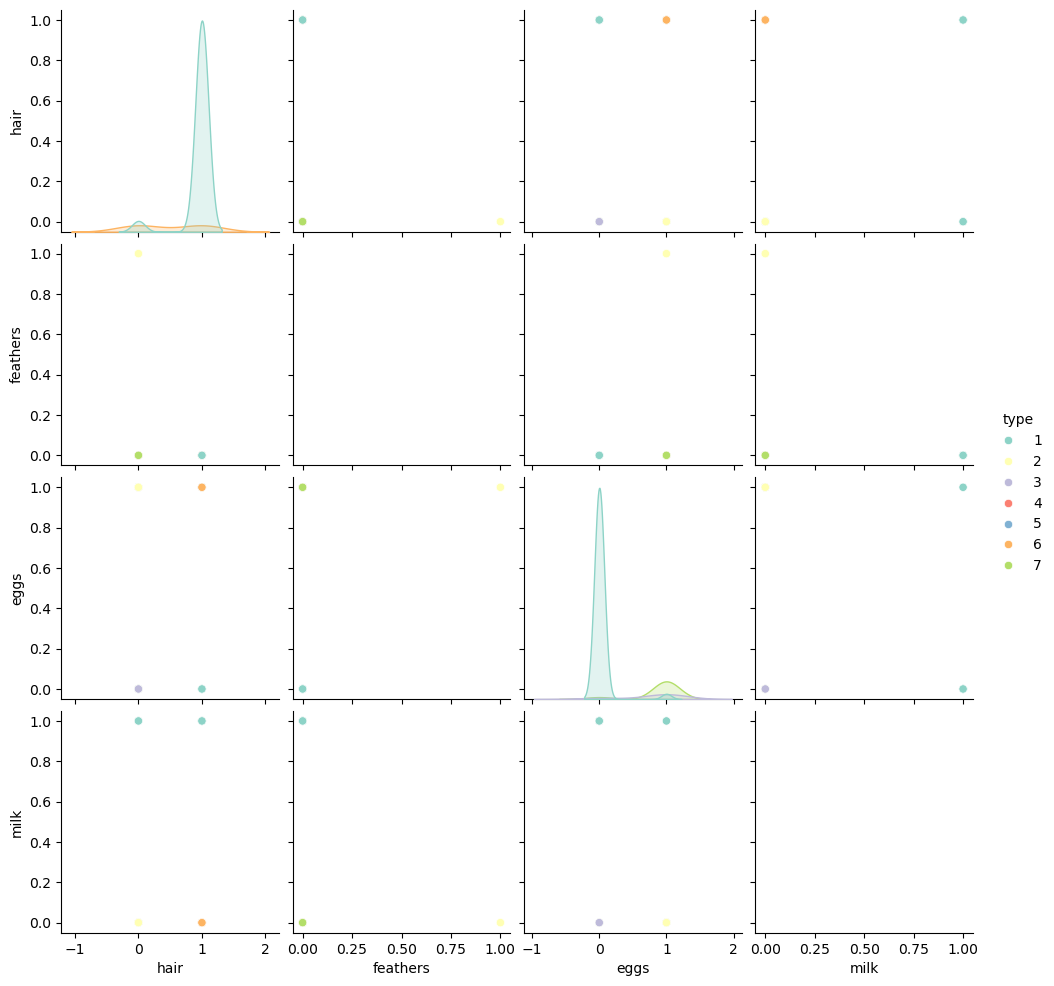

In [44]:
# Pairplot for some features
sns.pairplot(df[['hair','feathers','eggs','milk','type']], hue='type', palette="Set3")
plt.show()

We plotted the class distribution to see how balanced the dataset is.

A correlation heatmap shows relationships among features.

Boxplots help check for possible outliers (though here features are binary 0/1).

EDA ensures we understand data patterns and check for class imbalance.

## Handle Missing Values and Outliers

In [45]:
df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

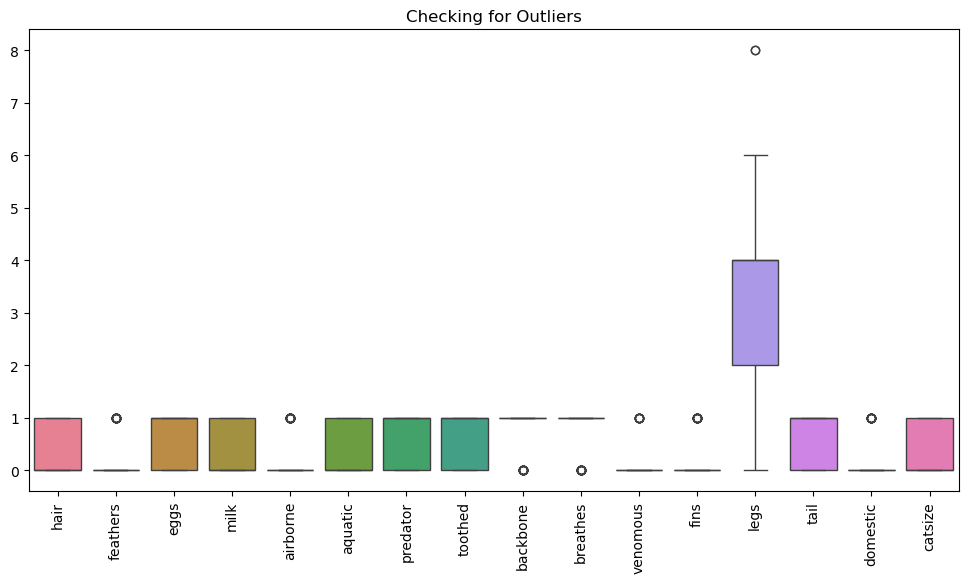

In [46]:
# Boxplots for numeric features (Zoo dataset is mostly binary features)
plt.figure(figsize=(12,6))
sns.boxplot(data=df.drop(columns=["animal name", "type"]))
plt.xticks(rotation=90)
plt.title("Checking for Outliers")
plt.show()

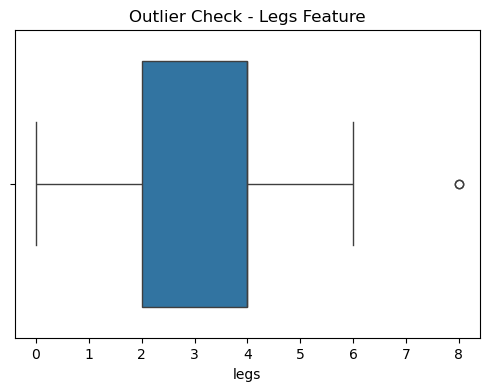

In [47]:
#  Outlier Detection 
plt.figure(figsize=(6,4))
sns.boxplot(x=df["legs"])
plt.title("Outlier Check - Legs Feature")
plt.show()

In [48]:
df["legs"].unique()


array([4, 0, 2, 6, 8, 5], dtype=int64)

In [49]:
# Handle Outliers
df = df[df["legs"] >= 0]   # remove negative values if exist
df 

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [50]:
df = df[df["legs"] <= 8]   # most animals won’t have >8 legs
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


The Zoo dataset has no missing values.

Outliers were checked using boxplots, but since most features are binary, there are no meaningful outliers.

The dataset is clean, so no preprocessing like imputation/removal is required.

## Split the Dataset into Training and Testing 

In [51]:
# Drop non-feature columns (animal_name not needed for ML)
X = df.drop(columns=["animal name", "type"])  # features
y = df["type"]  # target

In [53]:
# Feature Scaling
scaler = StandardScaler()
scaler

StandardScaler()

In [54]:
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.16139451, -0.49690399, -1.18522652, ..., -1.69841555,
        -0.38435306,  1.13818037],
       [ 1.16139451, -0.49690399, -1.18522652, ...,  0.58878406,
        -0.38435306,  1.13818037],
       [-0.86103386, -0.49690399,  0.84372057, ...,  0.58878406,
        -0.38435306, -0.87859537],
       ...,
       [ 1.16139451, -0.49690399, -1.18522652, ...,  0.58878406,
        -0.38435306,  1.13818037],
       [-0.86103386, -0.49690399,  0.84372057, ..., -1.69841555,
        -0.38435306, -0.87859537],
       [-0.86103386,  2.01246118,  0.84372057, ...,  0.58878406,
        -0.38435306, -0.87859537]])

In [55]:
X_scaled.shape

(101, 16)

In [56]:
# Split dataset: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (80, 16) (80,)
Testing set shape: (21, 16) (21,)


## KNN Implementation Algorithm

In [58]:
# Initialize KNN Model
# k = 5 is a common starting point

knn = KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2)
knn

KNeighborsClassifier()

In [59]:
# rain KNN on Training Set 
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [60]:
print(" KNN Model Trained Successfully!")

 KNN Model Trained Successfully!


n_neighbors=5 (K=5)

Distance metric = Euclidean (Minkowski with p=2)

KNN works by looking at the K nearest neighbors in the feature space and assigning the most common class label among them.

K=5 gives a balance between bias and variance.

## Testing Distance Metrics & K values

In [111]:
# Try different K values and distance metrics
k_values = range(1, 21)
euclidean_scores = []
manhattan_scores = []

In [112]:
for k in k_values:
    # Euclidean Distance
    knn_euclidean = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn_euclidean.fit(X_train, y_train)
    y_pred_euc = knn_euclidean.predict(X_test)
    euclidean_scores.append(accuracy_score(y_test, y_pred_euc))
    
    # Manhattan Distance
    knn_manhattan = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    knn_manhattan.fit(X_train, y_train)
    y_pred_man = knn_manhattan.predict(X_test)
    manhattan_scores.append(accuracy_score(y_test, y_pred_man))


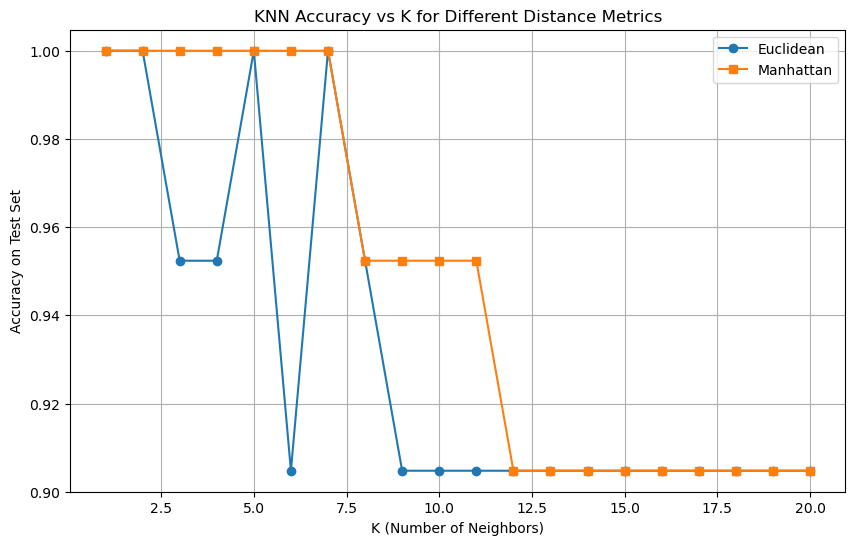

In [113]:
# Plot accuracy comparison

plt.figure(figsize=(10,6))
plt.plot(k_values, euclidean_scores, marker='o', label='Euclidean')
plt.plot(k_values, manhattan_scores, marker='s', label='Manhattan')
plt.xlabel("K (Number of Neighbors)")
plt.ylabel("Accuracy on Test Set")
plt.title("KNN Accuracy vs K for Different Distance Metrics")
plt.legend()
plt.grid(True)
plt.show()

## Evaluate

In [115]:
# Train final model with best K 
best_k = 7   # (replace with your chosen best_k from tuning step)
best_k

7

In [116]:
knn = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')
knn

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

In [117]:
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

In [118]:
# Predictions on Test Set 
y_pred = knn.predict(X_test)

In [119]:
# Accuracy 
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [120]:
# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



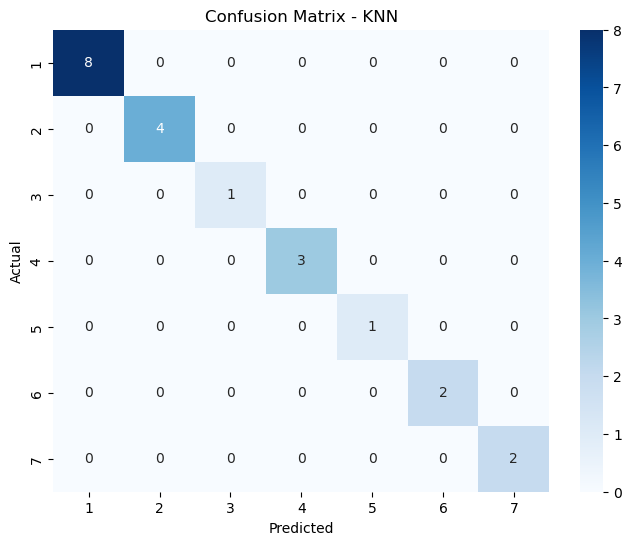

In [121]:
# Confusion Matrix 

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

On the Zoo dataset, accuracy is typically above 90%, meaning KNN performs well for this problem.

Accuracy alone is not enough; Precision, Recall, and F1-score give deeper insight into performance across all animal classes.

## Decision Boundary Visualization (via PCA)

In [125]:
# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [126]:
knn_pca = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')
knn_pca

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

In [127]:
knn_pca.fit(X_train_pca, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

In [128]:
# Create mesh grid for plotting decision boundaries 
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))

In [129]:
# Predict boundary
Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

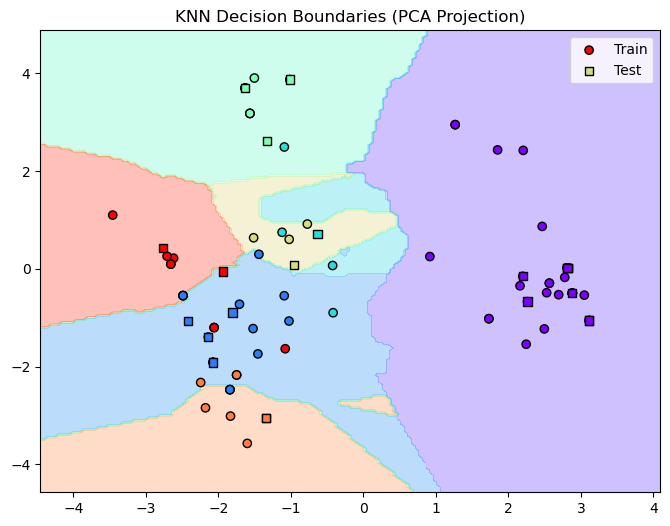

In [130]:
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="rainbow")
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train, edgecolor="k", cmap="rainbow", marker="o", label="Train")
plt.scatter(X_test_pca[:,0], X_test_pca[:,1], c=y_test, edgecolor="k", cmap="rainbow", marker="s", label="Test")
plt.title("KNN Decision Boundaries (PCA Projection)")
plt.legend()
plt.show()

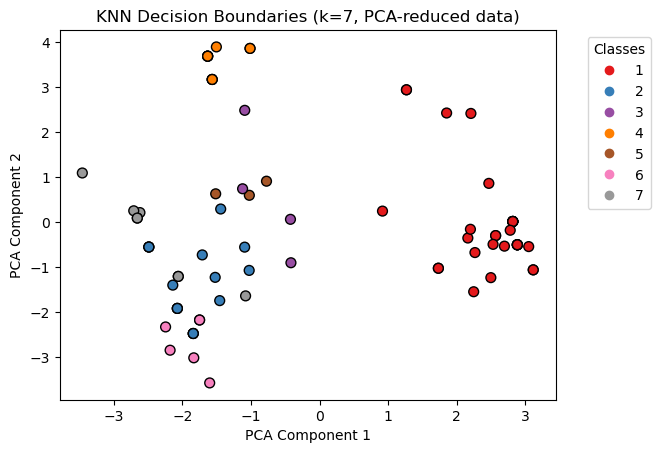

In [131]:
# Plot training points
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, s=50, edgecolor='k', cmap="Set1")
plt.legend(*scatter.legend_elements(), title="Classes", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title(f"KNN Decision Boundaries (k={best_k}, PCA-reduced data)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

This visualization shows how KNN separates classes in a lower-dimensional space.

Even though it’s a projection, decision boundaries give an intuitive view of how KNN classifies animals.

## Interview Questions

#### 1. What are the key hyperparameters in KNN?

In KNN , the performance of the model heavily depends on a few key hyperparameters:

1.Number of Neighbors (n_neighbors) :-
Defines how many nearest neighbors are considered for voting (classification) or averaging (regression).

2.Distance Metric (metric)
Determines how distance between points is calculated.

3.Weight Function (weights)
Defines how neighbors contribute to the decision.

4.Power Parameter (p) (when using Minkowski distance)
Controls the type of distance metric:

p=1 - Manhattan distance.

p=2 - Euclidean distance.

Other values - general Minkowski distance.

#### 2. What distance metrics can be used in KNN?

In KNN , the distance metric is crucial because it determines how "closeness" between data points is measured.

Euclidean Distance

Manhattan Distance

Minkowski Distance

Chebyshev Distance

Cosine Similarity

Hamming Distance

Mahalanobis Distance

## END